## Task-D: Collinear features and their effect on linear models

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/task_d.csv')

In [ ]:
data.head(5)

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [ ]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

## TASK- 1 (Logistic Regression)

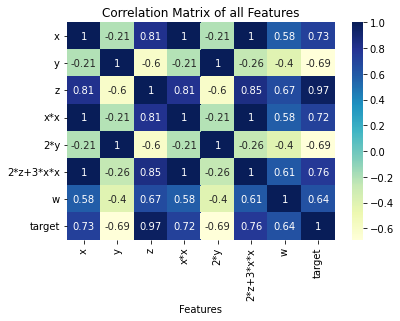

In [ ]:
#1. Finding Correlation Between Features

d=sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.xlabel("Features")
plt.xlabel("Features")
plt.title("Correlation Matrix of all Features")
plt.show()

In [ ]:
#Implementing Logistic Regression (SGDClassifier with log loss)
from sklearn.linear_model import SGDClassifier
from  sklearn.model_selection import RandomizedSearchCV
clf= SGDClassifier(loss='log') 
log_alpha=np.logspace(-4,4,num=10)
penalties=['l2','l1']

params={'alpha':log_alpha,'penalty':penalties}

search= RandomizedSearchCV(clf,param_distributions= params, cv=10,scoring='accuracy', refit=True)
search.fit(X,Y)

print("Best HyperParameters= ",search.best_params_)
print("Best Accuracy Score= ",search.best_score_)

Best HyperParameters=  {'penalty': 'l1', 'alpha': 0.046415888336127774}
Best Accuracy Score=  1.0


In [ ]:
#2. Finding the best model for the given data
#Refitting X_train with best parameters
best_model=SGDClassifier(loss='log',penalty='l1',alpha =0.046415888336127774)
best_model.fit(X,Y)
best_model_accuracy=best_model.score(X,Y)
print("Accuracy Score of Best Model= ",best_model_accuracy)

#3. Getting The Weights with Original Data
best_model_weights=best_model.coef_[0]
print("Best Model Weight Coefficients= ",list(best_model_weights))

Accuracy Score of Best Model=  1.0
Best Model Weight Coefficients=  [0.013965220762288203, -0.31311473341372714, 2.136705102886622, 0.0, -0.31311473341372714, 0.3121353776310456, 0.0]


In [ ]:
#4. Modifying original data

X_1=X+0.01 #Adding a noise of order 10^-2 to X
best_model.fit(X_1,Y)
best_model_accuracy_edited=best_model.score(X_1,Y)
best_model_weights_edited=best_model.coef_[0]
print("Weights Before Adding Noise: ", list(best_model_weights))
print("-"*100)
print("Weights After Adding Noise: ", list(best_model_weights_edited))
print("-"*100)


#5. Checking deviations in metric and weights 
abs_weights_diff= []
for i in range(len(best_model_weights)):
  abs_diff= abs(best_model_weights[i]-best_model_weights_edited[i])
  abs_weights_diff.append(abs_diff)
print("Best Model Accuracy After Adding Noise: ",best_model_accuracy_edited )
print("-"*100)
print("Absolute Change in Weights: ",abs_weights_diff)
print("-"*100)
perc_change=[]
for j in range(len(best_model_weights)):
  if best_model_weights[j]==0 and best_model_weights_edited[j]==0:
    perc_change.append(0)
  else:
    percentage_change_in_weights=np.round(((best_model_weights[j]-best_model_weights_edited[j])/best_model_weights[j])*100,5)
    perc_change.append(abs(percentage_change_in_weights))
print("Percentage Change in Weights: ", perc_change)
print("-"*100)
A=data.drop(['target'],axis=1)
col=A.columns
col
dic=dict()
for i in range(len(perc_change)):
  dic[col[i]]=perc_change[i]

#Top 4 features with highest %Change in Weights
dic=dict(sorted(dic.items(), key=lambda x: x[1], reverse=True)[:4])
print("Top 4 features with highest %Change in Weights after adding Noise: ", dic)

Weights Before Adding Noise:  [0.013965220762288203, -0.31311473341372714, 2.136705102886622, 0.0, -0.31311473341372714, 0.3121353776310456, 0.0]
----------------------------------------------------------------------------------------------------
Weights After Adding Noise:  [0.0, -0.2536533388657777, 2.410321101431759, 0.0, -0.2536533388657777, 0.13797369935191578, 0.0]
----------------------------------------------------------------------------------------------------
Best Model Accuracy After Adding Noise:  1.0
----------------------------------------------------------------------------------------------------
Absolute Change in Weights:  [0.013965220762288203, 0.059461394547949464, 0.2736159985451372, 0.0, 0.059461394547949464, 0.17416167827912982, 0.0]
----------------------------------------------------------------------------------------------------
Percentage Change in Weights:  [100.0, 18.99029, 12.80551, 0, 18.99029, 55.79684, 0]
----------------------------------------------

### OBSERVATION

* If we observe the Percentage change in weights dictionary with Top 4 weights having the highest percentage change in weights,
we see that only those features have appeared where there is a collinearity between them and other features. And also the percentage change is very high compared to the noise we added.

* Hence in this case, the correlation between features is predominant and we are not able to decide the feature importance based on this. 


## TASK 2 (Linear SVM)

In [ ]:
#Implementing Logistic Regression (SGDClassifier with log loss)
#Here if we change the loss parameter to Hinge Loss, SGDClassifer= LinearSVC
from sklearn.linear_model import SGDClassifier
from  sklearn.model_selection import RandomizedSearchCV
svc= SGDClassifier(loss='hinge')
penalties=['l2','l1']
params={'alpha':log_alpha,'penalty':penalties}

search_1= RandomizedSearchCV(estimator=svc,param_distributions= params, cv=10,scoring='accuracy', refit=True)
search_1.fit(X,Y)

print("Best HyperParameters= ",search_1.best_params_)
print("Best Accuracy Score= ",search_1.best_score_)

Best HyperParameters=  {'penalty': 'l2', 'alpha': 0.3593813663804626}
Best Accuracy Score=  1.0


In [ ]:
#2. Finding the best model for the given data
#Refitting X_train with best parameters
best_model_1=SGDClassifier(loss='hinge',penalty='l2',alpha=0.3593813663804626)
best_model_1.fit(X,Y)
best_model_accuracy_1=best_model.score(X,Y)
print("Accuracy Score of Best Model= ",best_model_accuracy_1)

#3. Getting The Weights with Original Data
best_model_weights_1=best_model_1.coef_[0]
print("Best Model Weight Coefficients= ",list(best_model_weights_1))

Accuracy Score of Best Model=  1.0
Best Model Weight Coefficients=  [0.16962962080411984, -0.26261193231974267, 0.470466016415809, 0.1621407518257031, -0.26261193231974267, 0.20272856039387674, 0.1413181964321502]


In [ ]:
#4. Modifying original data

X_2=X+0.01 #Adding a noise of order 10^-2 to X
best_model_1.fit(X_2,Y)
best_model_accuracy_edited_1=best_model.score(X_2,Y)
best_model_weights_edited_1=best_model.coef_[0]
print("Weights Before Adding Noise: ", list(best_model_weights_1))
print("-"*100)
print("Weights After Adding Noise: ", list(best_model_weights_edited_1))
print("-"*100)


#5. Checking deviations in metric and weights 
abs_weights_diff_1= []
for i in range(len(best_model_weights_1)):
  abs_diff_1= abs(best_model_weights_1[i]-best_model_weights_edited_1[i])
  abs_weights_diff_1.append(abs_diff_1)
print("Best Model Accuracy After Adding Noise: ",best_model_accuracy_edited_1 )
print("-"*100)
print("Absolute Change in Weights: ",abs_weights_diff_1)
print("-"*100)
perc_change_1=[]
for j in range(len(best_model_weights_1)):
  if best_model_weights_1[j]==0 and best_model_weights_edited_1[j]==0:
    perc_change_1.append(0)
  else:
    percentage_change_in_weights_1=np.round(((best_model_weights_1[j]-best_model_weights_edited_1[j])/best_model_weights_1[j])*100,2)
    perc_change_1.append(abs(percentage_change_in_weights_1))
print("Percentage Change in Weights: ", perc_change_1)

print("-"*100)

A_1=data.drop(['target'],axis=1)
col_1=A_1.columns
dic_1=dict()
for i in range(len(perc_change_1)):
  dic_1[col_1[i]]=perc_change_1[i]
  
#Top 4 features with highest %Change in Weights
dic_1=dict(sorted(dic_1.items(), key=lambda x: x[1], reverse=True)[:4])
print("Top 4 features with highest %Change in Weights after adding Noise: ", dic_1)

Weights Before Adding Noise:  [0.16962962080411984, -0.26261193231974267, 0.470466016415809, 0.1621407518257031, -0.26261193231974267, 0.20272856039387674, 0.1413181964321502]
----------------------------------------------------------------------------------------------------
Weights After Adding Noise:  [0.0, -0.2536533388657777, 2.410321101431759, 0.0, -0.2536533388657777, 0.13797369935191578, 0.0]
----------------------------------------------------------------------------------------------------
Best Model Accuracy After Adding Noise:  1.0
----------------------------------------------------------------------------------------------------
Absolute Change in Weights:  [0.16962962080411984, 0.008958593453964991, 1.9398550850159502, 0.1621407518257031, 0.008958593453964991, 0.06475486104196096, 0.1413181964321502]
----------------------------------------------------------------------------------------------------
Percentage Change in Weights:  [100.0, 3.41, 412.33, 100.0, 3.41, 31.94,

### OBSERVATION

* Even in SVM it is the same case as above in Logistic Regression as both are Linear Models

* Even in this case, the collinearity between features is predominant and we are not able to decide the feature importance based on this. 




## CONCLUSION

In any linear model, if there is a strong feature collinearity, then it is difficult or almost impossible to predict the Feature Importances based on Feature Weights.